Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

The temperature
The mean temperature each day
The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
The max windspeed for each day
The monthly mean of the daily max windspeeds (yer I am being nasty here)
You do not need to over comment your code. Marks will be given for how nice the plots are.

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [206]:

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", skiprows=19)
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,
1,1996,10,9.7,,,12.5,7.0,,,,,
2,1996,11,5.0,,,7.6,2.5,,,,,


In [207]:
df["day"]=1
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1,1996,10,9.7,,,12.5,7.0,,,,,,1
2,1996,11,5.0,,,7.6,2.5,,,,,,1


In [208]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])
df['date']

0     1996-08-01
1     1996-10-01
2     1996-11-01
3     1996-12-01
4     1997-01-01
         ...    
344   2025-05-01
345   2025-06-01
346   2025-07-01
347   2025-08-01
348   2025-09-01
Name: date, Length: 349, dtype: datetime64[ns]

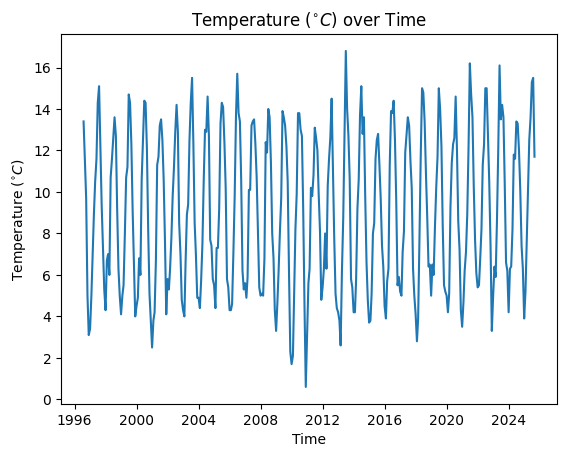

In [209]:


# plot the mean temperature

fig, ax = plt.subplots()

sns.lineplot(data=df, x="date", y="meant", ax=ax)

# Use raw strings (r"...") to prevent invalid escape warnings
ax.set_ylabel(r'Temperature ($^{\circ}C$)')
ax.set_xlabel('Time')
ax.set_title(r'Temperature ($^{\circ}C$) over Time')

plt.show()

There are 10624 resampled daily points from 349 data points


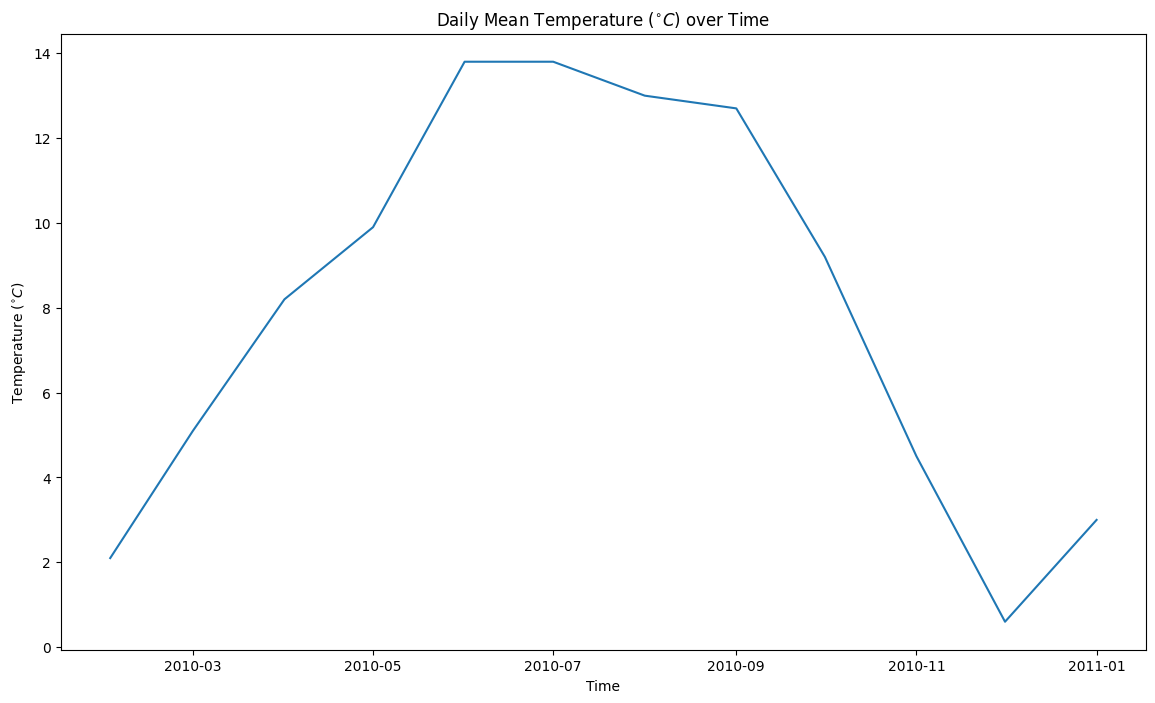

In [210]:


# Set date as index for resampling
df_indexed = df.set_index('date')

# Define date range
dateFrom = "2010-01-01 01:00:00"
dateTo = "2011-01-01 01:00:00"

# Resample to daily means
mean_daily_temp = df_indexed['meant'].resample('D').mean()
print(f"There are {mean_daily_temp.shape[0]} resampled daily points from {df.shape[0]} data points")

# Slice by date range
mean_daily_temp = mean_daily_temp.loc[dateFrom:dateTo]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot properly with x and y specified
sns.lineplot(x=mean_daily_temp.index, y=mean_daily_temp.values, ax=ax)

# Use raw strings to avoid warnings
ax.set_ylabel(r'Temperature ($^{\circ}C$)')
ax.set_xlabel('Time')
ax.set_title(r'Daily Mean Temperature ($^{\circ}C$) over Time')

plt.show()



There are 350 monthly averages from 349 original data points


C:\Users\finia\AppData\Local\Temp\ipykernel_9572\4218370200.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mean_monthly_temp = df_indexed['meant'].resample('M').mean()


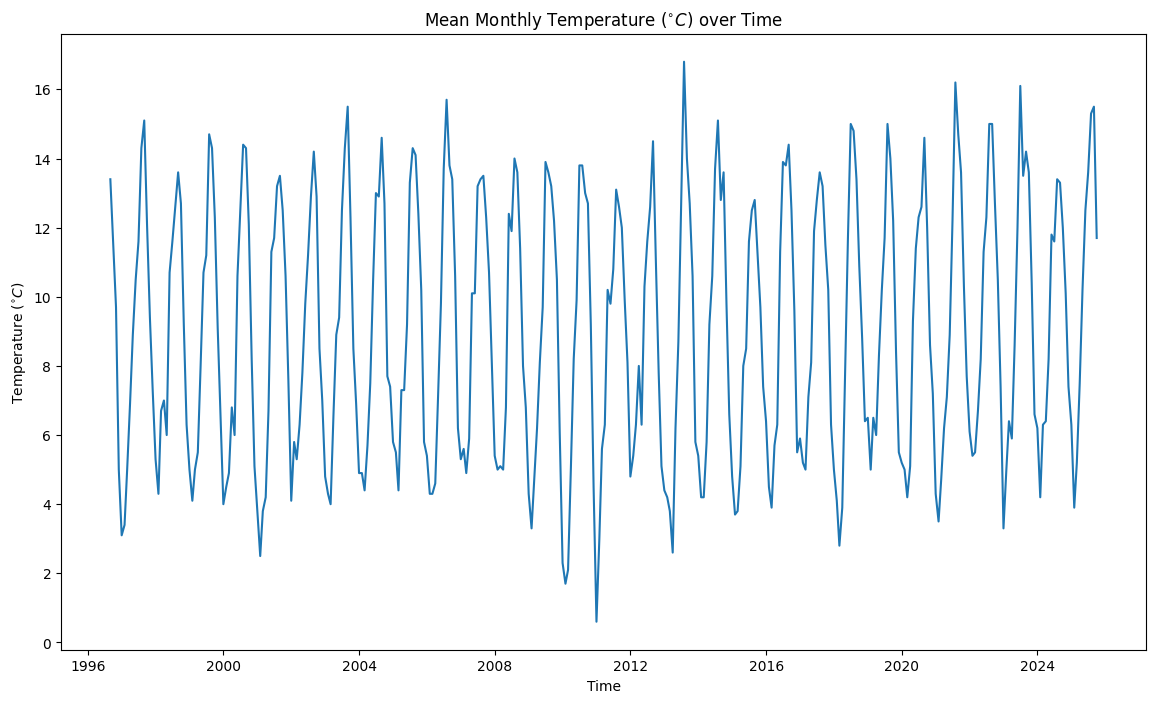

In [211]:
# Calculate mean temperature per month
mean_monthly_temp = df_indexed['meant'].resample('M').mean()

print(f"There are {mean_monthly_temp.shape[0]} monthly averages from {df.shape[0]} original data points")

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x=mean_monthly_temp.index, y=mean_monthly_temp.values, ax=ax)

# Label the plot
ax.set_ylabel(r'Temperature ($^{\circ}C$)')
ax.set_xlabel('Time')
ax.set_title(r'Mean Monthly Temperature ($^{\circ}C$) over Time')

plt.show()

In [212]:
# calculate the wind speed over 24 hours
# detering misssing values
df_indexed['wdsp'].isna().sum()


np.int64(0)

In [213]:
df_indexed['wdsp'].value_counts()

wdsp
8.8     18
8.3     13
8.6     13
9.4     13
9.1     12
        ..
6.8      1
7.2      1
13.6     1
13.5     1
11.7     1
Name: count, Length: 68, dtype: int64

In [214]:
df_indexed['wdsp'].str.startswith(' ').sum()

np.int64(2)

In [215]:
df_indexed['wdsp'] = np.where(df_indexed['wdsp'].str.startswith(' '), np.nan, df_indexed['wdsp'])

In [216]:
df_indexed['wdsp'].isna().sum()

np.int64(2)

In [217]:
df_indexed['wdsp'] = df_indexed['wdsp'].bfill()

In [218]:
df_indexed['wdsp'].isna().sum()

np.int64(0)

In [219]:
# Convert wdsp to numeric, coercing errors to NaN
df_indexed['wdsp'] = pd.to_numeric(df_indexed['wdsp'], errors='coerce')
mean_quarterly_windspeed = df_indexed['wdsp'].resample('QE').mean() # resampling per quarter

There are 117 resampled monthly points from 349 data points


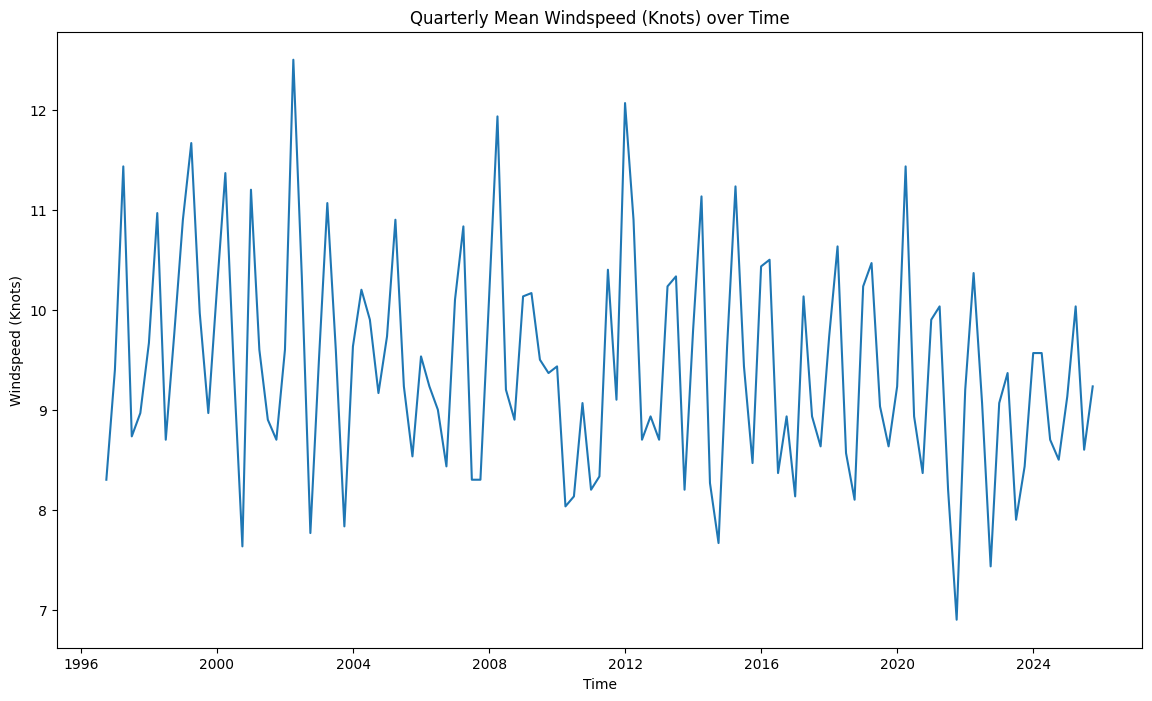

In [220]:
mean_quarterly_windspeed = df_indexed['wdsp'].resample('QE').mean() # resampling per week
print(f"There are {mean_quarterly_windspeed.shape[0]} resampled monthly points from {df_indexed.shape[0]} data points")


fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(mean_quarterly_windspeed)
ax.set_ylabel('Windspeed (Knots)')
ax.set_xlabel('Time')
ax.set_title('Quarterly Mean Windspeed (Knots) over Time');